# Random Forest Applied to the Dataset Generated by the Helper Module

## Importing Modules

In [1]:
# For data exploration
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import my_preprocessing_functions as mpf
# For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
# For displaying results
import seaborn as sn
import os
from pprint import pp

In [2]:
# Boolean to update the output or just load them from disk
# Change to True if you want to update the values stored on disk
update_results = False

In [3]:
# loading feature engineered data in a dataframe
# we rename the column names to not have issues when joining the dataframes

full_data_df = pd.DataFrame()
ramp_df = pd.read_csv("./Data/ram_features.csv", header=None)

injectionp_df = pd.read_csv("./Data/injection_pressure_features.csv", header=None)
injectionp_df.columns = np.arange(22, 44, dtype=int)

sensorp_df = pd.read_csv("./Data/sensor_pressure_features.csv", header=None)
sensorp_df.columns = np.arange(44, 66, dtype=int)

labels_df = pd.read_csv("./Data/Y2.csv", header=None)

full_data_df = ramp_df.join(injectionp_df.join(sensorp_df))
full_data_df[66] = labels_df
full_data_df

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029574,...,1.348450e+07,12153000.0,36289200.0,1.810414e+07,1.183458,-0.425242,0.656510,19348500.0,0.759095,1
1,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029305,...,1.183386e+07,12232000.0,32058500.0,1.635327e+07,1.100449,-0.568736,0.174720,17200000.0,0.755031,1
2,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029168,...,1.173513e+07,12930000.0,32070000.0,1.640097e+07,1.093430,-0.552906,0.734860,17237500.0,0.760460,1
3,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029315,...,1.247266e+07,11968000.0,33437000.0,1.695804e+07,1.113614,-0.569749,0.177975,17847000.0,0.762628,1
4,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029339,...,1.298727e+07,12652000.0,35078200.0,1.765239e+07,1.147779,-0.482242,0.670877,18733500.0,0.729493,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029395,...,1.363665e+07,12173500.0,36528800.0,1.824144e+07,1.187762,-0.418296,0.631007,19474000.0,0.739304,0
1538,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029345,...,1.275532e+07,12971000.0,34525900.0,1.751692e+07,1.111707,-0.552671,0.717994,18453500.0,0.746771,0
1539,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029421,...,1.238100e+07,12194000.0,33610200.0,1.677909e+07,1.172536,-0.417364,0.752829,17885500.0,0.872204,1
1540,20.000099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029284,...,1.401098e+07,12802000.0,37404600.0,1.870156e+07,1.167634,-0.463928,0.675784,19870000.0,0.727174,0


In [4]:
# pandas slicing includes the last index!
features = full_data_df.loc[:, 0:65]
labels = full_data_df.loc[:, 66]

In [5]:
scaled_features = mpf.normalize(features)
scaled_features

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,-0.999676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.501974,...,1.087917,1.045017,-0.726272,1.080923,0.919813,1.672058,1.169527,-0.376692,1.087917,0.239571
1,-0.999676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.518824,...,-0.931479,-0.800240,-0.584643,-0.892881,-0.827658,-0.972617,-0.902328,-0.580061,-0.931479,0.126121
2,-0.999676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.548079,...,-0.896233,-0.910617,0.666707,-0.887516,-0.780052,-1.196270,-0.673753,-0.343620,-0.896233,0.277676
3,-0.999676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.443703,...,-0.323358,-0.086129,-1.057934,-0.249751,-0.224066,-0.553176,-0.916950,-0.578687,-0.323358,0.338197
4,-0.999676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.269275,...,0.509872,0.489163,0.168318,0.515940,0.468939,0.535320,0.346533,-0.370627,0.509872,-0.586794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,-0.999676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156899,...,1.205875,1.215108,-0.689520,1.192707,1.056853,1.809176,1.269817,-0.387457,1.205875,-0.312912
1538,-0.999676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.223540,...,0.246698,0.229867,0.740210,0.258268,0.333731,-0.613960,-0.670365,-0.350739,0.246698,-0.104464
1539,-0.999676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.349722,...,-0.287171,-0.188590,-0.652769,-0.168946,-0.402664,1.324074,1.283280,-0.336035,-0.287171,3.397103
1540,-0.999676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.682951,...,1.578080,1.633571,0.437233,1.601306,1.516076,1.167898,0.610959,-0.368556,1.578080,-0.651531


In [6]:
pr = mpf.drop_rows_with_only_nan_values(scaled_features)
pr

,0,9,10,11,12,13,14,15,16,17,...,56,57,58,59,60,61,62,63,64,65
0,-0.999676,1.501974,1.939444,-0.343346,-0.999676,0.564167,1.715246,1.649904,1.958295,-1.773758,...,1.087917,1.045017,-0.726272,1.080923,0.919813,1.672058,1.169527,-0.376692,1.087917,0.239571
1,-0.999676,-0.518824,-0.486110,0.360816,-0.999676,-0.387596,-0.449908,-0.656303,-0.797283,0.815002,...,-0.931479,-0.800240,-0.584643,-0.892881,-0.827658,-0.972617,-0.902328,-0.580061,-0.931479,0.126121
2,-0.999676,-1.548079,-2.029322,-0.295393,-0.999676,-0.073770,-1.500208,-1.993306,-1.710538,1.163351,...,-0.896233,-0.910617,0.666707,-0.887516,-0.780052,-1.196270,-0.673753,-0.343620,-0.896233,0.277676
3,-0.999676,-0.443703,-0.014819,-0.403499,-0.999676,0.731069,-0.191695,0.538220,-0.031719,-0.341763,...,-0.323358,-0.086129,-1.057934,-0.249751,-0.224066,-0.553176,-0.916950,-0.578687,-0.323358,0.338197
4,-0.999676,-0.269275,0.172989,-0.852749,-0.999676,0.531535,0.056051,-0.141051,0.033288,-0.487708,...,0.509872,0.489163,0.168318,0.515940,0.468939,0.535320,0.346533,-0.370627,0.509872,-0.586794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,-0.999676,0.156899,1.990826,-2.224057,-0.999676,2.518716,2.039757,1.707890,1.710315,-2.723858,...,1.205875,1.215108,-0.689520,1.192707,1.056853,1.809176,1.269817,-0.387457,1.205875,-0.312912
1538,-0.999676,-0.223540,-0.560524,0.676301,-0.999676,-0.785332,-1.440889,-1.103627,-0.722483,0.967658,...,0.246698,0.229867,0.740210,0.258268,0.333731,-0.613960,-0.670365,-0.350739,0.246698,-0.104464
1539,-0.999676,0.349722,0.725781,-0.610877,-0.999676,0.898390,1.291287,1.129682,0.922857,-1.164887,...,-0.287171,-0.188590,-0.652769,-0.168946,-0.402664,1.324074,1.283280,-0.336035,-0.287171,3.397103
1540,-0.999676,-0.682951,0.867523,-2.214382,-0.999676,2.280118,0.886520,1.020336,0.664132,-1.926989,...,1.578080,1.633571,0.437233,1.601306,1.516076,1.167898,0.610959,-0.368556,1.578080,-0.651531


In [7]:
aa = mpf.balance(pr, labels)
X_a = aa[0]
y_a = aa[1]

In [8]:
X_a

,0,9,10,11,12,13,14,15,16,17,...,56,57,58,59,60,61,62,63,64,65
0,-0.999676,1.501974,1.939444,-0.343346,-0.999676,0.564167,1.715246,1.649904,1.958295,-1.773758,...,1.087917,1.045017,-0.726272,1.080923,0.919813,1.672058,1.169527,-0.376692,1.087917,0.239571
1,-0.999676,-0.518824,-0.486110,0.360816,-0.999676,-0.387596,-0.449908,-0.656303,-0.797283,0.815002,...,-0.931479,-0.800240,-0.584643,-0.892881,-0.827658,-0.972617,-0.902328,-0.580061,-0.931479,0.126121
2,-0.999676,-1.548079,-2.029322,-0.295393,-0.999676,-0.073770,-1.500208,-1.993306,-1.710538,1.163351,...,-0.896233,-0.910617,0.666707,-0.887516,-0.780052,-1.196270,-0.673753,-0.343620,-0.896233,0.277676
3,-0.999676,-0.443703,-0.014819,-0.403499,-0.999676,0.731069,-0.191695,0.538220,-0.031719,-0.341763,...,-0.323358,-0.086129,-1.057934,-0.249751,-0.224066,-0.553176,-0.916950,-0.578687,-0.323358,0.338197
4,-0.999676,-0.269275,0.172989,-0.852749,-0.999676,0.531535,0.056051,-0.141051,0.033288,-0.487708,...,0.509872,0.489163,0.168318,0.515940,0.468939,0.535320,0.346533,-0.370627,0.509872,-0.586794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,-0.999676,0.990673,1.965590,-1.096018,-0.999676,1.355439,2.041320,1.813859,1.891663,-2.129617,...,1.066744,1.134059,-1.388233,1.091595,0.898808,1.946317,1.306634,-0.387508,1.066744,-0.419822
2156,-0.999676,-0.733965,0.270375,-0.920922,-0.999676,1.128081,0.055156,0.121743,-0.099235,-0.624158,...,-1.125046,-0.869875,-1.407497,-1.041782,-1.009747,-0.891289,-1.043949,-0.580905,-1.125046,-0.225679
2157,-0.999676,0.923401,0.374323,0.757268,-0.999676,-1.039526,-0.211293,0.251846,0.358798,0.320961,...,-0.295957,-0.394521,0.331956,-0.339043,-0.352241,0.011813,0.111896,-0.373235,-0.295957,-0.969036
2158,-0.999676,0.368850,1.277389,-1.259116,-0.999676,0.989577,1.011982,1.236432,0.999971,-1.429179,...,1.322720,1.161272,0.110503,1.283886,1.122217,1.759163,1.436098,-0.386899,1.322720,-0.255614


In [9]:
y_a

0       1
1       1
2       1
3       1
4       1
       ..
2155    0
2156    0
2157    0
2158    0
2159    0
Name: 66, Length: 2160, dtype: int64

## Pipeline Creation
- Our pipeline must perform the following before proceeding to train on the dataset:
    1. Standarization (StandardScaler).
    2. Drop NaN values / Constant Values (irrelevant for classification).
    3. Balance the dataset using the `SMOTE` module.

In [4]:
# In our case are simply columns with full NaN values
class DropFullNaNColumns():
    def __init__(self):
        print("\n>>>>init() called.\n")

    def fit(self, X, y=None):
        print("\n>>>>fit() called.\n")
        return self

    def transform(self, dataset):
        print("\n>>>>transform \"drop_nan_columns()\" called.\n")
        dataset.dropna(axis=1, inplace=True)

In [7]:
# Pipeline on top of the dataset obtainef by using the `Helper.py` module.
helper_pl = Pipeline([
    ('scaler', StandardScaler())
    # ('drop_nan', DropFullNaNColumns()),
])

- We apply the pipeline on the feature engineered dataset

In [10]:
data_preprocessed = helper_pl.fit_transform(full_data_df)
data_preprocessed

array([[-7.10542736e-15,  0.00000000e+00,  0.00000000e+00, ...,
         1.08826972e+00,  2.39648334e-01,  6.54047229e-01],
       [-7.10542736e-15,  0.00000000e+00,  0.00000000e+00, ...,
        -9.31781307e-01,  1.26161587e-01,  6.54047229e-01],
       [-7.10542736e-15,  0.00000000e+00,  0.00000000e+00, ...,
        -8.96523261e-01,  2.77765807e-01,  6.54047229e-01],
       ...,
       [-7.10542736e-15,  0.00000000e+00,  0.00000000e+00, ...,
        -2.87264212e-01,  3.39820457e+00,  6.54047229e-01],
       [-7.10542736e-15,  0.00000000e+00,  0.00000000e+00, ...,
         1.57859162e+00, -6.51742038e-01, -1.52894157e+00],
       [-7.10542736e-15,  0.00000000e+00,  0.00000000e+00, ...,
         1.43285836e+00, -1.78498949e-01,  6.54047229e-01]])

In [12]:
data_preprocessed

array([[-7.10542736e-15,  0.00000000e+00,  0.00000000e+00, ...,
         1.08826972e+00,  2.39648334e-01,  6.54047229e-01],
       [-7.10542736e-15,  0.00000000e+00,  0.00000000e+00, ...,
        -9.31781307e-01,  1.26161587e-01,  6.54047229e-01],
       [-7.10542736e-15,  0.00000000e+00,  0.00000000e+00, ...,
        -8.96523261e-01,  2.77765807e-01,  6.54047229e-01],
       ...,
       [-7.10542736e-15,  0.00000000e+00,  0.00000000e+00, ...,
        -2.87264212e-01,  3.39820457e+00,  6.54047229e-01],
       [-7.10542736e-15,  0.00000000e+00,  0.00000000e+00, ...,
         1.57859162e+00, -6.51742038e-01, -1.52894157e+00],
       [-7.10542736e-15,  0.00000000e+00,  0.00000000e+00, ...,
         1.43285836e+00, -1.78498949e-01,  6.54047229e-01]])

- We normalize the data before proceeding to use boxplot for every feature

In [4]:
cols_to_norm = [i for i in range(0, 66)]  # we exclude the labels
full_data_df[cols_to_norm] = full_data_df[cols_to_norm].apply(lambda x: (x - x.mean()) / x.std())
full_data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,-0.999676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.501974,...,1.045017,-0.726272,1.080923,0.919813,1.672058,1.169527,-0.382122,1.087917,0.239571,1
1,-0.999676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.518824,...,-0.800240,-0.584643,-0.892881,-0.827658,-0.972617,-0.902328,-0.583253,-0.931479,0.126121,1
2,-0.999676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.548079,...,-0.910617,0.666707,-0.887516,-0.780052,-1.196270,-0.673753,-0.349413,-0.896233,0.277676,1
3,-0.999676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.443703,...,-0.086129,-1.057934,-0.249751,-0.224066,-0.553176,-0.916950,-0.581894,-0.323358,0.338197,1
4,-0.999676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.269275,...,0.489163,0.168318,0.515940,0.468939,0.535320,0.346533,-0.376124,0.509872,-0.586794,1


- **Note**: The NaN values are generated from columns which statistically have no relevance. The standard deviation of those numbers are zero (floating point) and its division by it during normalization produce those values.
- Now we will proceed to drop those features which do not contribute.

In [5]:
# we will not yet drop inplace=Tru the NaN before we will do boxplot it
full_data_df.dropna(axis=1).describe()  # we drop along the columns axis=1

,0,9,10,11,12,13,14,15,16,17,...,57,58,59,60,61,62,63,64,65,66
count,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,...,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1542.000000,1.542000e+03,1.542000e+03,1542.000000
mean,-9.996757e-01,1.948233e-14,6.801304e-15,1.680742e-15,-9.996757e-01,4.390205e-15,-4.510241e-14,-7.431669e-14,-2.044078e-14,1.594344e-15,...,-2.820053e-15,-1.198062e-16,-1.251053e-15,1.760229e-15,-1.271789e-15,4.607930e-16,0.000000,-1.211885e-15,3.317709e-15,0.700389
std,2.221166e-16,1.000000e+00,1.000000e+00,1.000000e+00,2.221166e-16,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,0.458236
min,-9.996757e-01,-2.718529e+00,-2.980763e+00,-3.562554e+00,-9.996757e-01,-3.392491e+00,-2.791275e+00,-2.713996e+00,-2.562774e+00,-3.802716e+00,...,-2.749356e+00,-3.568701e+00,-2.512066e+00,-2.730771e+00,-2.577519e+00,-1.293336e+00,-0.592589,-2.519926e+00,-1.165349e+00,0.000000
25%,-9.996757e-01,-7.024125e-01,-7.518754e-01,-6.368523e-01,-9.996757e-01,-6.701804e-01,-5.668019e-01,-8.112096e-01,-8.058754e-01,-5.712700e-01,...,-7.248681e-01,-6.126554e-01,-7.202132e-01,-7.116764e-01,-7.111062e-01,-7.808198e-01,-0.579933,-7.136551e-01,-5.320928e-01,0.000000
50%,-9.996757e-01,-7.296535e-02,2.327431e-02,-1.440073e-02,-9.996757e-01,2.249234e-03,-1.009711e-01,-9.383351e-02,1.239774e-02,1.194674e-01,...,1.341570e-02,2.758586e-02,2.299008e-02,1.116590e-02,-2.630358e-01,-3.717274e-01,-0.373635,2.464398e-02,-1.152257e-01,1.000000
75%,-9.996757e-01,6.561977e-01,4.365399e-01,6.573717e-01,-9.996757e-01,6.552018e-01,6.226369e-01,6.425953e-01,5.297110e-01,6.938897e-01,...,7.145871e-01,6.814970e-01,6.994893e-01,7.253287e-01,5.821131e-01,4.717218e-01,-0.350520,6.970319e-01,1.821477e-01,1.000000
max,-9.996757e-01,3.443609e+00,3.764368e+00,3.516085e+00,-9.996757e-01,3.549042e+00,3.578569e+00,3.457427e+00,3.815630e+00,3.356335e+00,...,2.571423e+00,3.389021e+00,2.421489e+00,2.402760e+00,6.999047e+00,9.178524e+00,2.639779,2.378413e+00,4.206606e+00,1.000000


### Analysis of the ramp position dataframe with engineered features

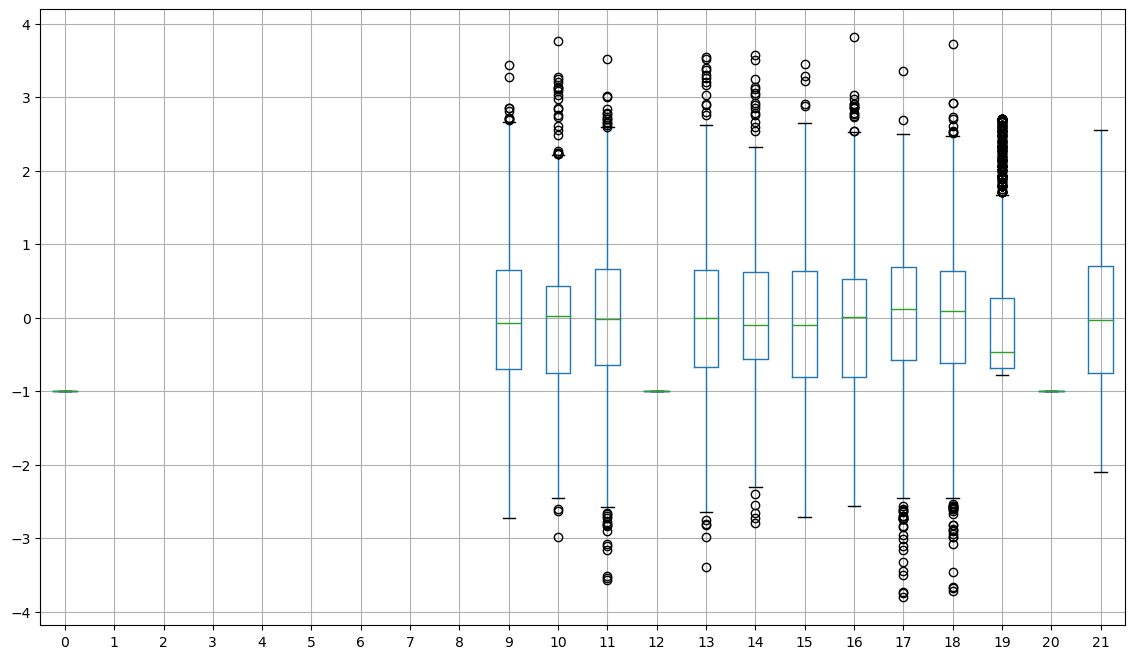

In [6]:
columns_given_0 = [i for i in range(22)]
full_data_df.boxplot(column=columns_given_0, figsize=(14, 8))
plt.show()

### Analysis of the injection pressure dataframe with engineered features

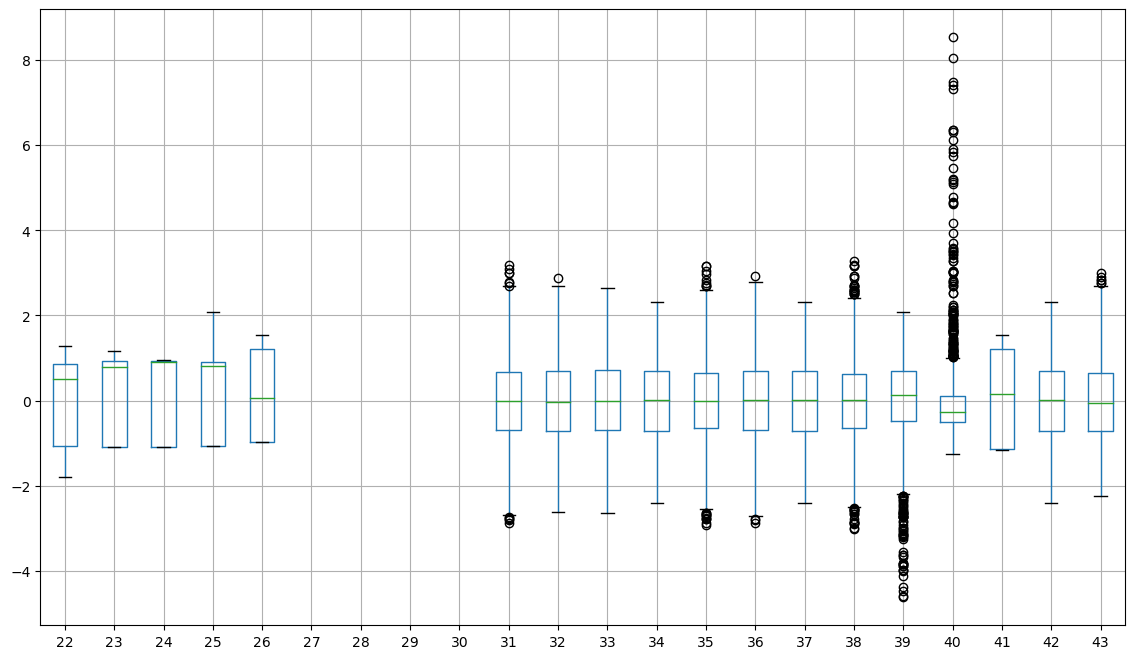

In [7]:
columns_given_1 = [i for i in range(22, 44)]
full_data_df.boxplot(column=columns_given_1, figsize=(14, 8))
plt.show()

### Analysis of the sensor pressure dataframe with engineered features

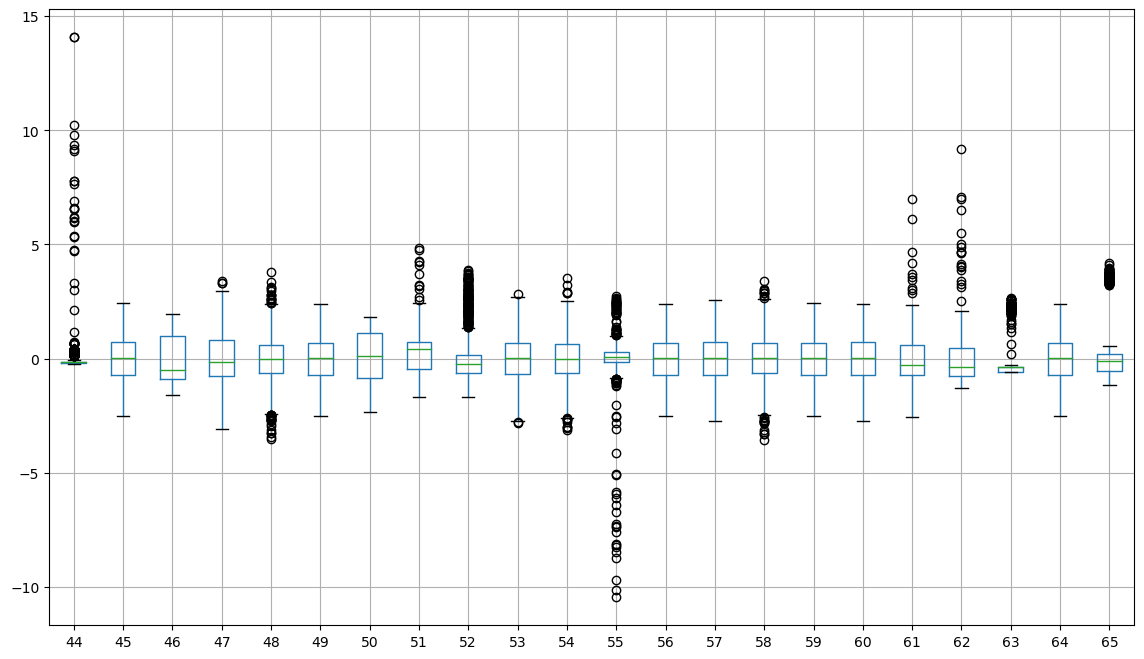

In [8]:
columns_given_2 = [i for i in range(44, 66)]
full_data_df.boxplot(column=columns_given_2, figsize=(14, 8))
plt.show()

In [9]:
# Checking datatypes
full_data_df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
62    float64
63    float64
64    float64
65    float64
66      int64
Length: 67, dtype: object

In [10]:
# Statistical description
full_data_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
count,1.542000e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.542000e+03,...,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1.542000e+03,1542.000000,1.542000e+03,1.542000e+03,1542.000000
mean,-9.996757e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.948233e-14,...,-2.820053e-15,-1.198062e-16,-1.251053e-15,1.760229e-15,-1.271789e-15,4.607930e-16,0.000000,-1.211885e-15,3.317709e-15,0.700389
std,2.221166e-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,0.458236
min,-9.996757e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.718529e+00,...,-2.749356e+00,-3.568701e+00,-2.512066e+00,-2.730771e+00,-2.577519e+00,-1.293336e+00,-0.592589,-2.519926e+00,-1.165349e+00,0.000000
25%,-9.996757e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.024125e-01,...,-7.248681e-01,-6.126554e-01,-7.202132e-01,-7.116764e-01,-7.111062e-01,-7.808198e-01,-0.579933,-7.136551e-01,-5.320928e-01,0.000000
50%,-9.996757e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.296535e-02,...,1.341570e-02,2.758586e-02,2.299008e-02,1.116590e-02,-2.630358e-01,-3.717274e-01,-0.373635,2.464398e-02,-1.152257e-01,1.000000
75%,-9.996757e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.561977e-01,...,7.145871e-01,6.814970e-01,6.994893e-01,7.253287e-01,5.821131e-01,4.717218e-01,-0.350520,6.970319e-01,1.821477e-01,1.000000
max,-9.996757e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.443609e+00,...,2.571423e+00,3.389021e+00,2.421489e+00,2.402760e+00,6.999047e+00,9.178524e+00,2.639779,2.378413e+00,4.206606e+00,1.000000


#### Prunning Data

In [11]:
full_data_df.dropna(axis=1, inplace=True)
full_data_df.head()

,0,9,10,11,12,13,14,15,16,17,...,57,58,59,60,61,62,63,64,65,66
0,-0.999676,1.501974,1.939444,-0.343346,-0.999676,0.564167,1.715246,1.649904,1.958295,-1.773758,...,1.045017,-0.726272,1.080923,0.919813,1.672058,1.169527,-0.382122,1.087917,0.239571,1
1,-0.999676,-0.518824,-0.486110,0.360816,-0.999676,-0.387596,-0.449908,-0.656303,-0.797283,0.815002,...,-0.800240,-0.584643,-0.892881,-0.827658,-0.972617,-0.902328,-0.583253,-0.931479,0.126121,1
2,-0.999676,-1.548079,-2.029322,-0.295393,-0.999676,-0.073770,-1.500208,-1.993306,-1.710538,1.163351,...,-0.910617,0.666707,-0.887516,-0.780052,-1.196270,-0.673753,-0.349413,-0.896233,0.277676,1
3,-0.999676,-0.443703,-0.014819,-0.403499,-0.999676,0.731069,-0.191695,0.538220,-0.031719,-0.341763,...,-0.086129,-1.057934,-0.249751,-0.224066,-0.553176,-0.916950,-0.581894,-0.323358,0.338197,1
4,-0.999676,-0.269275,0.172989,-0.852749,-0.999676,0.531535,0.056051,-0.141051,0.033288,-0.487708,...,0.489163,0.168318,0.515940,0.468939,0.535320,0.346533,-0.376124,0.509872,-0.586794,1


- The length of the dataset after prunning is:

In [12]:
print(f"The number of datapoints is {len(full_data_df)}")
# we subtract the label from the number of attributes/features
print(f"The number of attributes/features is {len(full_data_df.columns) - 1}")

The number of datapoints is 1542
The number of attributes/features is 54


## Selecting the Machine Learning Model
-  Because were dealing with a classification problem but not a regression, we need to consider models that allows to classify.
- Let's start with:
    1. Decision trees & Ensembles
    2. kNN
    3. SVM
    4. Neural Networks

### Decision Trees & Ensembles
- We will start by using _decision trees_ with bagging (Bootstrap Aggregating). The idea is that using the same model, we will randomly arrange the initial tree configuration and then proceed to calculate the outcome.
- By same model we mean how we split and select the features and how we predict the outcome (simple voting, weighted voting).
- We will use the class RandomForestClassifier which incorporates the methods and attributes when working with a decission tree with bagging.
- **NOTE**: Due to the random initial configuration for the decision trees, this algorithm naturally incorporates cross-validation which can also help with overfitting.
- **TODO**: Constant values on the features are not relevant when splitting. Is it a good idea to drop those features?

- Splitting the data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    full_data_df.drop([66], axis=1),
    full_data_df[66],
    test_size=0.2)

In [14]:
n = len(full_data_df)
n_train = len(X_train)
n_test = len(X_test)

- The splitting looks as follows:

In [15]:
print(f"The total number of datapoints is: {n}")
print(f"The size of training set is {n_train} which correspond to the {n_train * 100 / n:.2f}%")
print(f"The size of test set is {n_test} which correspond to the {n_test * 100 / n:.2f}%")

The total number of datapoints is: 1542
The size of training set is 1233 which correspond to the 79.96%
The size of test set is 309 which correspond to the 20.04%


#### Tranining Phase

- We create an instance of the Random Forest Classifier (RFC)

In [16]:
pilot_model_rfc = RandomForestClassifier()

- We now train a pilot model:

In [17]:
pilot_model_rfc.fit(X_train, y_train)

RandomForestClassifier()

- It is important to note that in a time series problem the mean accuracy cannot be considered as a good indicator for the performance. The reason for this is that the datapoins are time correlated and are therefore not independent from each other. However, after the feature engineering which allows to represent the time series problem as a classification problem with tabular data, then we at this point can consider the mean accuracy as good indicator for the performance of the algorithm **ONLY** when we have a balanced dataset!. We will address this issue later, for now we will work with mean accuracy.

In [18]:
print(f"The mean accuracy of the model with defaults is: \
{pilot_model_rfc.score(X_test, y_test) * 100:.2f}%")

The mean accuracy of the model with defaults is: 73.79%


- The defaults of this method are:

In [19]:
pilot_model_rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Hyperparameter Optimization
- Now we will explore the effect of some hyperparameters

In [20]:
def rfc_train_evaluator(model_rfc) -> tuple:
    model_rfc.fit(X_train, y_train)
    mean_accuracy = model_rfc.score(X_test, y_test) * 100
    y_predicted = model_rfc.predict(X_test)
    return (mean_accuracy, y_predicted)

- The default number of trees is 100 which can be considered a reasonable good attempt. However, we are now explore lower an higher values to see if we could improve the performance of our model:

In [21]:
accuracy_rfc = []
predictions_rfc = []
n_trees_list = [x for x in range(5, 400, 5)]
# The paths where the files will be saved
accuracy_rfc_path = "./Data/accuracy_rfc.txt"
predictions_rfc_path = "./Data/predictions_rfc.txt"
if update_results:
    print("Generating the accuracy and predictions ...")
    for n_trees in n_trees_list:
        model_rfc = RandomForestClassifier(n_estimators=n_trees)
        accuracy, prediction = rfc_train_evaluator(model_rfc)
        accuracy_rfc.append(round(accuracy, 2))
        predictions_rfc.append(prediction)
    accuracy_rfc = np.array(accuracy_rfc)
    predictions_rfc = np.array(predictions_rfc)
    np.savetxt("./Data/accuracy_rfc.txt", accuracy_rfc)
    np.savetxt("./Data/predictions_rfc.txt", predictions_rfc)
else:
    if not os.path.exists(accuracy_rfc_path) and not os.path.exists(predictions_rfc_path):
        print("Generating the accuracy and predictions ...")
        for n_trees in n_trees_list:
            model_rfc = RandomForestClassifier(n_estimators=n_trees)
            accuracy, prediction = rfc_train_evaluator(model_rfc)
            accuracy_rfc.append(round(accuracy, 2))
            predictions_rfc.append(prediction)
        accuracy_rfc = np.array(accuracy_rfc)
        predictions_rfc = np.array(predictions_rfc)
        np.savetxt("./Data/accuracy_rfc.txt", accuracy_rfc)
        np.savetxt("./Data/predictions_rfc.txt", predictions_rfc)
    else:
        print("Loading accuracy and predictions from disk ...")
        accuracy_rfc = np.loadtxt("./Data/accuracy_rfc.txt")
        predictions_rfc = np.loadtxt("./Data/predictions_rfc.txt").astype(dtype=int)

Loading accuracy and predictions from disk ...


- We know plot to see the effect of the number of trees on the performance of the model:

In [22]:
# we will plot also the running average
window_rfc = 5
rolling_mean_average = []
for index in range(len(accuracy_rfc) - window_rfc + 1):
    rolling_mean_average.append(np.mean(accuracy_rfc[index:index+window_rfc]))
for index in range(window_rfc - 1):
    rolling_mean_average.insert(0, np.nan)

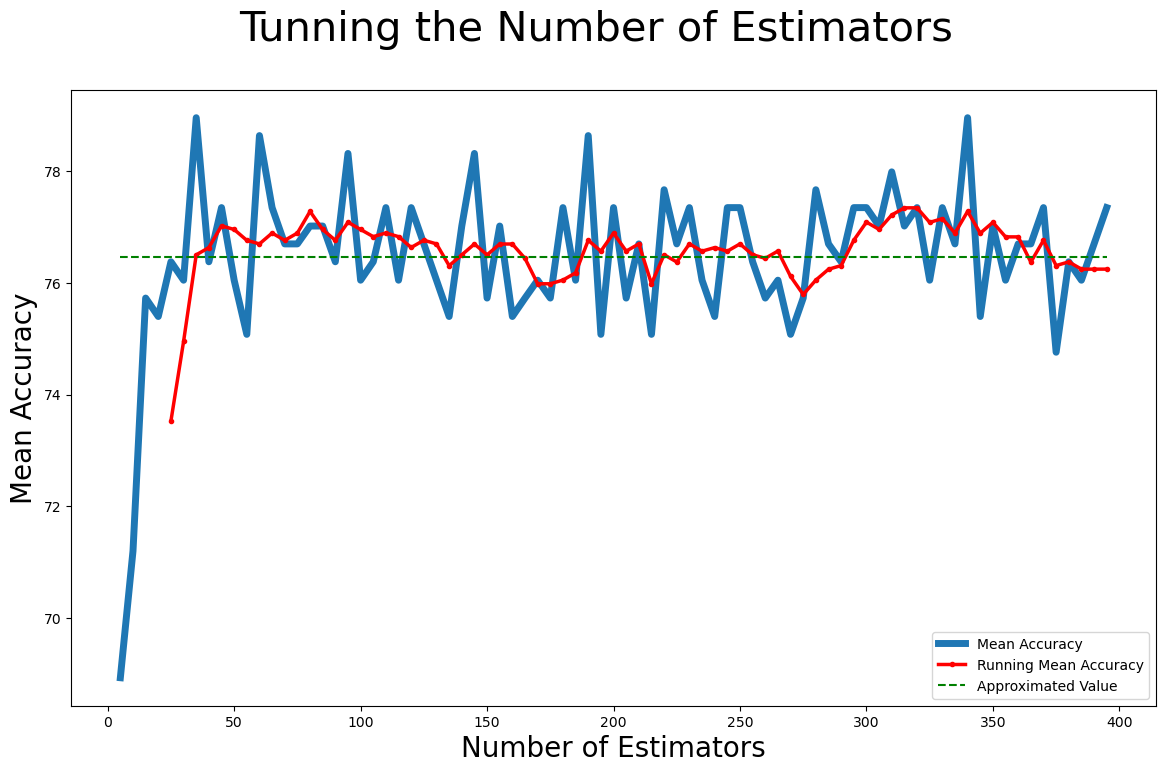

In [23]:
fig_rfc = plt.figure(figsize=[14, 8])
fs = 20  # fontsize
lw = 5  # linewidth
fig_rfc.suptitle("Tunning the Number of Estimators", fontsize=fs * 1.5)
plt.xlabel("Number of Estimators", fontsize=fs)
plt.ylabel("Mean Accuracy", fontsize=fs)
plt.plot(n_trees_list, accuracy_rfc, linewidth=lw, label="Mean Accuracy")
plt.plot(n_trees_list, rolling_mean_average, "r.-", linewidth=0.5*lw, label="Running Mean Accuracy")
plt.hlines(np.mean(accuracy_rfc), min(n_trees_list), max(n_trees_list), color='green', linestyle='dashed', label='Approximated Value')
plt.legend()
plt.show()

- From the plot above we can see that the mean accuracy increases with the number of trees (number of estimators). Starting with a number of trees equal to 10 already provides an accuracy close to 70% and this rapidily increases as we increase the number of trees. However, we see that we reach a plateau with middle accuracy of around 74%. Therefore for further explorations on the hyperparameter optimization _we will choose the number of estimators equal to $200$_. Also We can see why the default value is chosen to $100$.

- **IMPORTANT:**
    - The Mean Average have no meaning when the labeling of the data is imbalanced.

In [24]:
# percentage of valid products
pvp_train = np.count_nonzero(y_train)/len(y_train) * 100
print(f"The imbalance of the training set has:\n {pvp_train:.2f}% of valid products and \
      \n {100 - pvp_train:.2f}& of invalid products")

The imbalanced of the training set has:
 70.32% of valid products and       
 29.68& of invalid products


In [25]:
# percentage of valid products
pvp_test = np.count_nonzero(y_test)/len(y_test) * 100
print(f"The imbalance of the test set has:\n {pvp_test:.2f}% of valid products and \
      \n {100 - pvp_test:.2f}& of invalid products")

The unbalanced of the test set has:
 68.93% of valid products and       
 31.07& of invalid products


- We observer that the imbalance of data is even more pronounced for the test set, therefore **we cannot rely on the Mean accuracy** as indicator of performance.
- Seems to be reasonable to choose as number of estimators, `n_estimators=200` as the Random Forest algorithm seems to reach a plateau value.

In [26]:
tunned_rfc = RandomForestClassifier(n_estimators=200)
pilot_model_rfc.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
tunned_accuracy, tunned_predictions = rfc_train_evaluator(tunned_rfc)
cm = confusion_matrix(y_test, tunned_predictions)

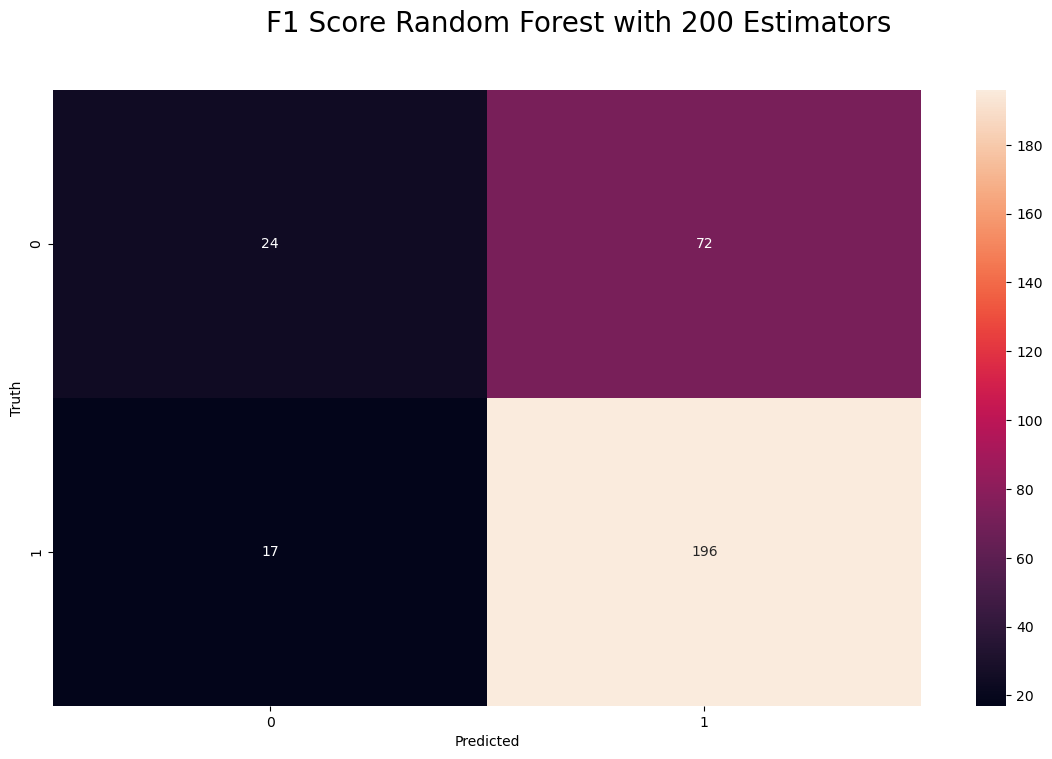

In [28]:
fig_rfc = plt.figure(figsize=[14, 8])
fs = 20  # fontsize
lw = 5  # linewidth
fig_rfc.suptitle("F1 Score Random Forest with 200 Estimators", fontsize=fs)
sn.heatmap(cm, annot=True, fmt="")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [29]:
tn, fp, fn, tp = confusion_matrix(y_test, tunned_predictions).ravel()
print(f"From the test dataset with {len(y_test)} datapoints, we conclude:\n")
print(f"True Positives: {tp} were correctly identified as valid products\n\
True Negatives: {tn} were correctly identified as not valid products\n\
False Positives: {fp} were incorrectly identified as valid products\n\
False Negative: {fp} were incorrectly identified as not valid products")

From the test dataset with 309 datapoints, we conclude:

True Positives: 196 were correctly identified as valid products
True Negatives: 24 were correctly identified as not valid products
False Positives: 72 were incorrectly identified as valid products
False Negative: 72 were incorrectly identified as not valid products


##### Chosing the Error Indicator
- We naturally will chose as the F1 score which is the correct metric when dealing with imbalanced data.
- We recall here the formula of the F1 score:
$$F_1 score  = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$
- The F1 score is based on the harmonic average between precision and recall. Both precision and recall are rates.
- Here the Precision is calculated for each particular class. In our case total number of correctly classified products divided by the total number of correctly classified products and incorrectly classified not valid products. Analogously for the not valid product class.
- The recall for the correctly classified products is given by the number of correctly classified products divided by the sum of correctly classified products and incorrectly classified valid products. Analogously for the non valid product class.
- Manually calculating the $F_1$ score for each class: "valid" and "not valid".

In [30]:
precision_valid_class = tp / (tp + fp)
recall_valid_class = tp / (tp + fn)
f1_valid_class = 2 * precision_valid_class * recall_valid_class / (precision_valid_class + recall_valid_class)
print(f"The precision of the valid class is {precision_valid_class:.2f}\n\
The recall of the valid class is {recall_valid_class:.2f}\n\
The F1 score of the valid class is: {f1_valid_class:.2f}")

The precision of the valid class is 0.73
The recall of the valid class is 0.92
The F1 score of the valid class is: 0.81


In [31]:
precision_not_valid_class = tn / (tn + fn)
recall_not_valid_class = tn / (tn + fp)
f1_not_valid_class = 2 * precision_not_valid_class * recall_not_valid_class / (precision_not_valid_class + recall_not_valid_class)
print(f"The precision of the not valid class is {precision_not_valid_class:.2f}\n\
The recall of the not valid class is {recall_not_valid_class:.2f}\n\
The F1 score of the not valid class is: {f1_not_valid_class:.2f}")

The precision of the not valid class is 0.59
The recall of the not valid class is 0.25
The F1 score of the not valid class is: 0.35


- A faster way to calculate the relevant values is by passing the option **average=None** to the above functions

In [32]:
precisions = precision_score(y_test, tunned_predictions, average=None)
recalls = recall_score(y_test, tunned_predictions, average=None)
f1_scores = f1_score(y_test, tunned_predictions, average=None)
p_not_valid_class, p_valid_class = precisions[0], precisions[1]
r_not_valid_class, r_valid_class = recalls[0], recalls[1]
f1_not_valid_class, f1_valid_class = f1_scores[0], f1_scores[1]

In [33]:
print(f"The precission for the not valid and valid classes are respectively {precisions[0]:.2f} and {precisions[1]:.2f}")
print(f"The recall for the not valid and valid classes are respectively {recalls[0]:.2f} and {recalls[1]:.2f}")
print(f"The f1 scores for the not valid and valid classes are respectively {f1_scores[0]:.2f} and {f1_scores[1]:.2f}")

The precission for the not valid and valid classes are respectively 0.59 and 0.73
The recall for the not valid and valid classes are respectively 0.25 and 0.92
The f1 scores for the not valid and valid classes are respectively 0.35 and 0.81


- For now on our error metric will be the _F1 score for the not valid class as our to-go indicator of the model performance!!_

In [34]:
f1_scores_not_valid_rfc = []
f1_scores_valid_rfc = []
for prediction in predictions_rfc:
    f1_scores_rfc = f1_score(y_test, prediction, average=None)
    f1_scores_not_valid_rfc.append(f1_scores_rfc[0])
    f1_scores_valid_rfc.append(f1_scores_rfc[1])

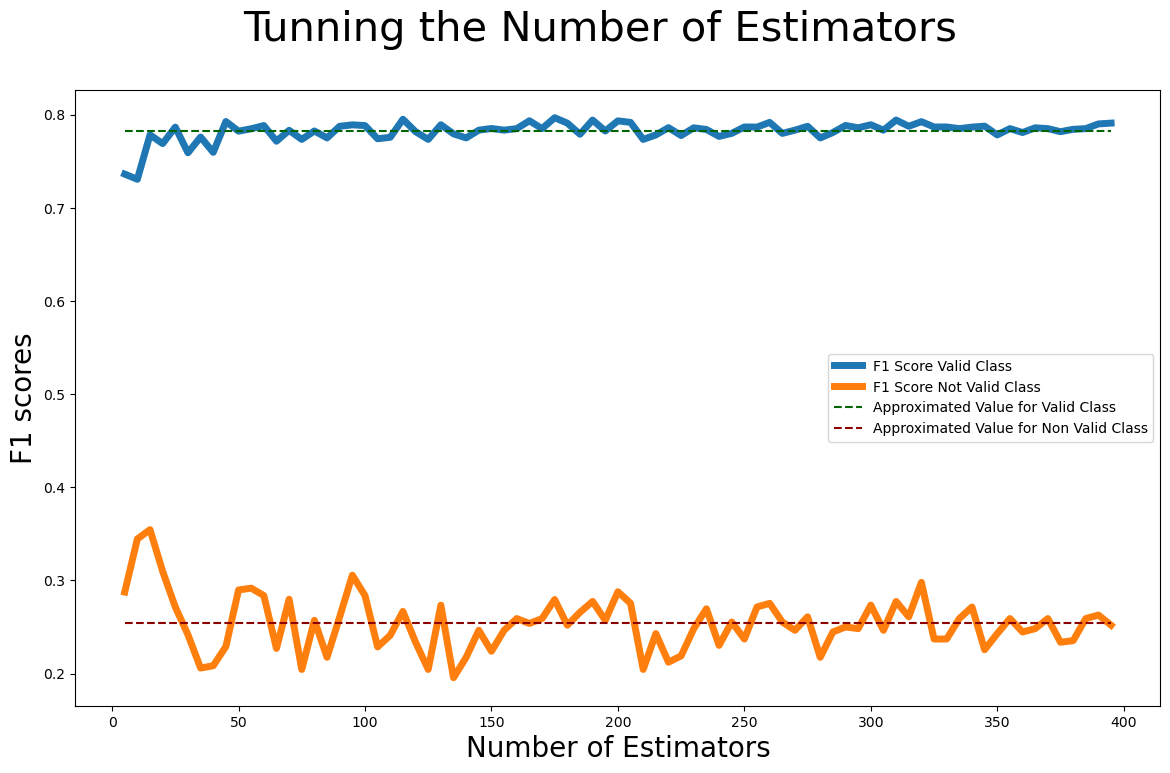

In [35]:
fig_rfc = plt.figure(figsize=[14, 8])
fs = 20  # fontsize
lw = 5  # linewidth
fig_rfc.suptitle("Tunning the Number of Estimators", fontsize=fs * 1.5)
plt.xlabel("Number of Estimators", fontsize=fs)
plt.ylabel("F1 scores", fontsize=fs)
plt.plot(n_trees_list, f1_scores_valid_rfc, linewidth=lw, label="F1 Score Valid Class")
plt.plot(n_trees_list, f1_scores_not_valid_rfc, linewidth=lw, label="F1 Score Not Valid Class")
plt.hlines(np.mean(f1_scores_valid_rfc), min(n_trees_list), max(n_trees_list), color='darkgreen', linestyle='dashed', label='Approximated Value for Valid Class')
plt.hlines(np.mean(f1_scores_not_valid_rfc), min(n_trees_list), max(n_trees_list), color='darkred', linestyle='dashed', label='Approximated Value for Non Valid Class')
plt.legend()
plt.show()

- No significant improvement is obtained when the number of estimators of the Random Forest Algorithm increases. Let's pick another hyperparameter.
- So far we have manually searched for the best hyperparameter for the number of estimators.

#### Random Search Training
- We create a hyperparameter grid:

- First some review of Split Criteria
1. Gini:
    $$H(Q_m) = 1 - \sum_{c=k}p_{mk}(1 - p_{mk})$$
    - where:
        - $Q_m$ is a subset obtained at the moment os splitting.
        - $k$ is the number of different classes at the node of the split.
2. Log Loss or Entropy
    $$H(Q_m) = -\sum_{c=k}p_{mk}\log(p_{mk})$$

- here we redefine the hyperparameters range having in mind that:
    1. We have an imbalanced dataset
    2. We have 55 attributes and
    3. We have 1233 datapoints to train

In [36]:
# number of trees in the forest
n_estimators = [x for x in range(10, 400, 10)]

# Check https://scikit-learn.org/stable/modules/tree.html#tree-mathematical-formulation
# gini index: works better for small datasets - based on rational ratios
# entropy: works better for bigger datasets - approach to continue uses log entropy
criterion = ["gini", "entropy", "log_loss"]

# max_features = [sqrt(n_features), log2(n_features)] at every split
# can introduce overfitting if number is too small
max_features = ["sqrt", "log2"]

# When False the whole dataset is used to build each tree, if True the dataset
# is resampled with replacement! -- Expect to perform worst when is True
bootstrap = [True, False]

- We create a random grid:

In [37]:
param_grid = {
    'n_estimators': n_estimators,
    'criterion': criterion,
    'max_features': max_features,
    'bootstrap': bootstrap}
pp(param_grid, depth=1, width=36)
print(f"The total number of hyperparameter combination is: {len(n_estimators)*len(criterion)*len(max_features)*len(bootstrap)}")

{'n_estimators': [...],
 'criterion': [...],
 'max_features': [...],
 'bootstrap': [...]}
The total number of hyperparameter combination is: 468


- We will not execute the random forest model for every single possible combination but take a random search and try a combination.

In [38]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    # n_iter=400,  # the size of random set choosen as new population
    cv=None,  # to specify a type of cross validation - reduces overfitting!
    verbose=0,  # more messages and feedback (the higher the more messages)
    # random_state=42,  # particular random seed given so this result can be reproduced
    n_jobs=-1)  # to give how many jobs can run in parallel (-1 means use all processors)
rf_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200, 210, 220, 230,
                                          240, 250, 260, 270, 280, 290, 300, ...]})

- Viewing the best parameters during the training:

In [39]:
rf_grid.best_params_

{'bootstrap': True,
 'criterion': 'log_loss',
 'max_features': 'sqrt',
 'n_estimators': 320}

In [40]:
bne = rf_grid.best_params_['n_estimators']
bmf = rf_grid.best_params_['max_features']
bc = rf_grid.best_params_['criterion']
bb = rf_grid.best_params_['bootstrap']

- Lets evaluate the best found combination of parameters:

In [41]:
best_rfc = RandomForestClassifier(n_estimators=bne,
                                  max_features=bmf,
                                  criterion=bc,
                                  bootstrap=bb)
best_rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', n_estimators=320)

In [42]:
best_accuracy, best_predictions = rfc_train_evaluator(best_rfc)
cm_best = confusion_matrix(y_test, best_predictions)

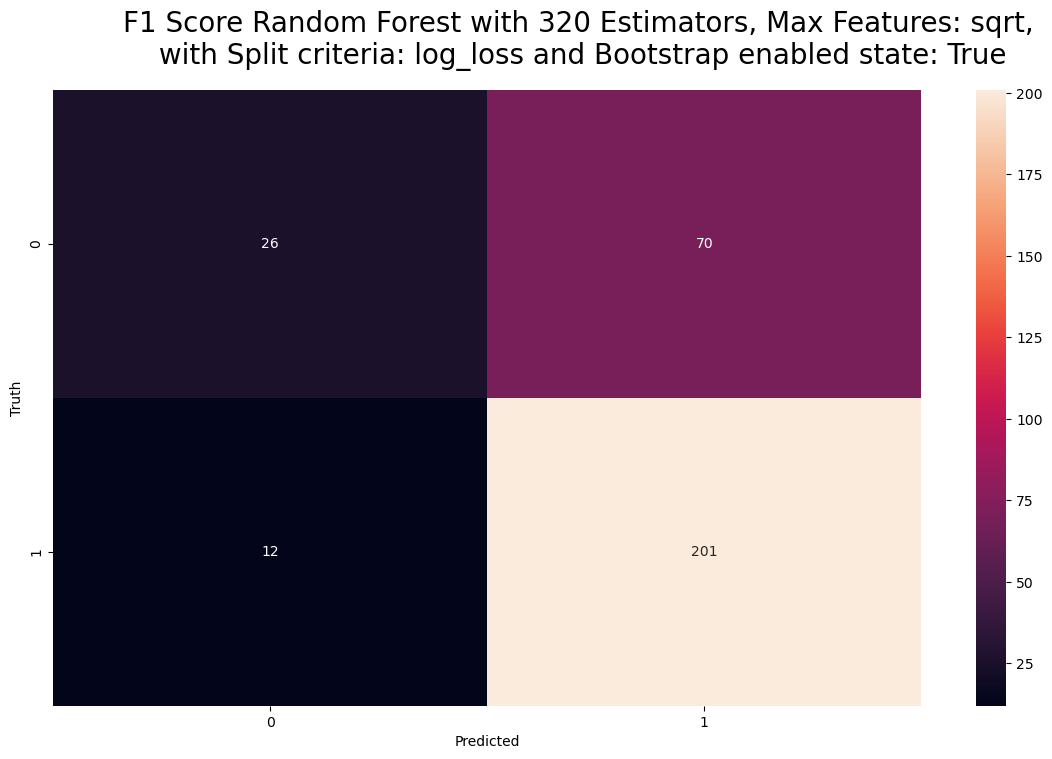

In [43]:
fig_best_rfc = plt.figure(figsize=[14, 8])
fs = 20  # fontsize
lw = 5  # linewidth
title = "F1 Score Random Forest with " + str(bne) + " Estimators" +\
    ", Max Features: " + bmf + \
    ",\n with Split criteria: " + bc + \
    " and Bootstrap enabled state: " + str(bb)
fig_best_rfc.suptitle(title, fontsize=fs)
sn.heatmap(cm_best, annot=True, fmt="")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [44]:
best_precisions = precision_score(y_test, best_predictions, average=None)
best_recalls = recall_score(y_test, best_predictions, average=None)
best_f1_scores = f1_score(y_test, best_predictions, average=None)

In [ ]:
print(f"The best precission for the not valid and valid classes are \
          respectively {best_precisions[0]:.2f} and {best_precisions[1]:.2f}")
print(f"The best recall for the not valid and valid classes are \
    respectively {best_recalls[0]:.2f} and {best_recalls[1]:.2f}")
print(f"The best f1 scores for the not valid and valid classes are \
    respectively {best_f1_scores[0]:.2f} and {best_f1_scores[1]:.2f}")

The best precission for the not valid and valid classes are           respectively 0.68 and 0.74
The best recall for the not valid and valid classes are     respectively 0.27 and 0.94
The best f1 scores for the not valid and valid classes are     respectively 0.39 and 0.83


## Conclusions:

- From the plot F1 scores vs Number of Estimators we can see that only the F1 score for the valid class improves slightly unlike the not valid class which is also the minority class due to the imbalanced nature of our dataset.
- We are **not** able to improve the f1 score for the non valid class!
- We will use other ML models as well as explore other techniques to deal with imbalance datasets, such data augmentation and undersampling.
- We can improved the feature filtering of our timeseries by calculating the pvalue of the new features and then drop those who are below a defined threshold. This is actually what is done when using other libraries such **tsfresh**

### How to avoid overfitting using Random Forest
- Random Forest incorporates cross validation when the number of estimators increases, therefore it intrinsically keeps overfitting in place, but still can happen if decision tree splits are done careless.
- Controling the `max_features` parameter which control what is the maximum value of features that one considers when looking for the best fit. The smaller the number can introduce overfitting, so this parameter should not be _too slow_.
- The heigh of the tree is not a parameter we wish to control as we are always looking to binary question: is the product valid or not? So we leave the height free until the model is able to reach a _leaf_ node.

## TODO:
- In the next notebook, we will: first use another library for feature extraction called **tsfresh**, which stands for: **Time series feature extraction based on scalable hypothesis tests**.
    - Check the conference: PyCon.DE 2017 [tsfresh](https://www.youtube.com/watch?v=Fm8zcOMJ-9E&ab_channel=PyConDE)

- Secondly we deal with the imabalanced dataset by using both:
    - Undersampling of majority class.
    - Data augmentation of the minority class. Taking in consideration:
        - The injection moulding of the object was thermo-mechanically modeled using moulding process-specific software (Moldflow 2021, Autodesk). The polymer used in the simulations was Sabic PHC27, a standard grade unfilled polypropylene (PP). The software was coupled with MATLAB (version R2019b, MathWorks), in order to perform simulations in batch while sequentially varying relevant process parameters within practically relevant ranges. 
    - Reference paper [arxiv link here](https://arxiv.org/abs/2206.15285v1)